## MNIST HANDWRITTEN DIGIT CLASSIFICATION

> Building an ANN usin Pytorch framework

In [1]:
# importing necessary libraries

import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

In [2]:
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
# importing dataset

trainset = datasets.MNIST('./train', download=True, train=True, transform=transform)
valset = datasets.MNIST('./val', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw


Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw




Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw


Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./val/MNIST/raw/train-images-idx3-ubyte.gz to ./val/MNIST/raw




Extracting ./val/MNIST/raw/train-labels-idx1-ubyte.gz to ./val/MNIST/raw


Extracting ./val/MNIST/raw/t10k-images-idx3-ubyte.gz to ./val/MNIST/raw


Extracting ./val/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./val/MNIST/raw
Processing...
Done!


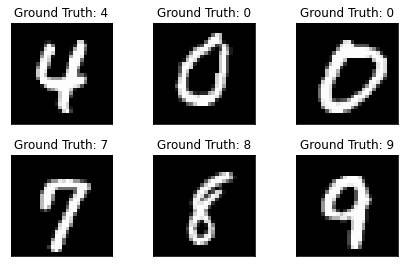

In [5]:
# plotting some examples for visualisation

examples = enumerate(valloader)
batch_idx, (example_data, example_targets) = next(examples)

import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


In [6]:
#### Creating Model

class ANN_Model(nn.Module):

  def __init__(self, input_features=784, hidden1=224, hidden2=224, hidden3=224, out_features=10):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features, hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.f_connected3 = nn.Linear(hidden2, hidden3)
    self.out = nn.Linear(hidden3, out_features)

  def forward(self,x):
    x = nn.functional.relu(self.f_connected1(x))
    x = nn.functional.relu(self.f_connected2(x))
    x = nn.functional.relu(self.f_connected3(x))
    x = nn.functional.log_softmax(self.out(x), dim=1)
    return x

In [7]:
#instantiate ANN_model

model = ANN_Model()

In [8]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=784, out_features=224, bias=True)
  (f_connected2): Linear(in_features=224, out_features=224, bias=True)
  (f_connected3): Linear(in_features=224, out_features=224, bias=True)
  (out): Linear(in_features=224, out_features=10, bias=True)
)>

In [9]:
# Loss and Optimizer

loss_function = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Training

epochs = 50
final_losses=[]

for e in range(1, epochs+1):
  for images, labels in trainloader:
      
    images = images.view(images.shape[0], -1)           # Flatten MNIST images into a 784 long vector
    optimizer.zero_grad()
    output = model(images)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()

  final_losses.append(loss)
  print("Epoch number: {} and the loss : {}".format(e,loss.item()))


Epoch number: 1 and the loss : 0.07228966802358627
Epoch number: 2 and the loss : 0.204262375831604
Epoch number: 3 and the loss : 0.24249301850795746
Epoch number: 4 and the loss : 0.14144857227802277
Epoch number: 5 and the loss : 0.4248676002025604
Epoch number: 6 and the loss : 0.005695783998817205
Epoch number: 7 and the loss : 0.06448087841272354
Epoch number: 8 and the loss : 0.02361178770661354
Epoch number: 9 and the loss : 0.0013329304056242108
Epoch number: 10 and the loss : 0.013742925599217415
Epoch number: 11 and the loss : 0.03527089208364487
Epoch number: 12 and the loss : 0.0019084225641563535
Epoch number: 13 and the loss : 0.00514851463958621
Epoch number: 14 and the loss : 0.02383427321910858
Epoch number: 15 and the loss : 0.001274140435270965
Epoch number: 16 and the loss : 0.02870846726000309
Epoch number: 17 and the loss : 0.20331142842769623
Epoch number: 18 and the loss : 0.019057951867580414
Epoch number: 19 and the loss : 0.0005923697026446462
Epoch number: 

Text(0.5, 0, 'Epoch')

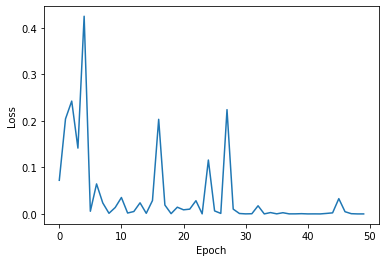

In [11]:
# Loss vs Epochs plot

plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [12]:
# Prediction in test data

X_test = []
y_test = []
y_pred = []
prediction_array = []
correct_count, all_count = 0, 0

for images,labels in valloader:
  for i in range(len(labels)):

    X_test.append(images[i].view(28, 28))
    y_test.append(int(labels[i]))

    img = images[i].view(1, 784)
    
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    prediction_array.append(probab)
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

    y_pred.append(pred_label)

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.981


In [13]:
def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'white'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
                                         color=color)
    return

def plot_value_array(predictions_array, true_label):
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

    return

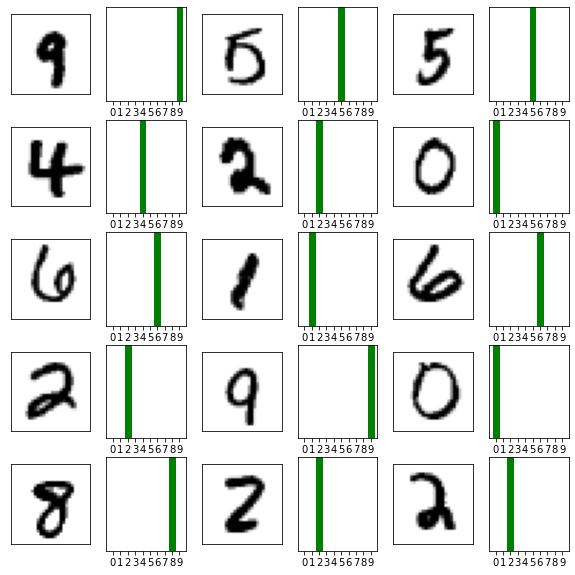

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(prediction_array[i], y_test[i], X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(prediction_array[i], y_test[i])
    plt.xticks(range(10), [i for i in range(10)])
plt.show()

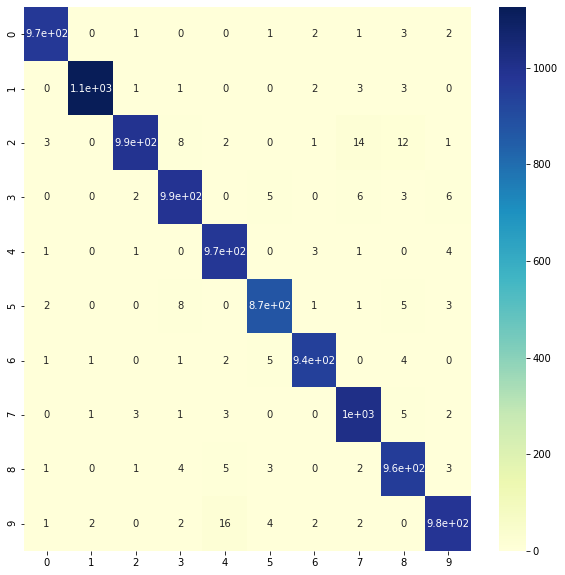

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mat, cmap="YlGnBu", annot = True)